In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Use knn model on indian diabetes patient's database and predict whether a new patiest is diabetic(1) or not(0)

In [44]:
df = pd.read_csv('diabetes_KNN.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### VALUES OF 'GLUCOSE', 'BloodPressure' etc cannot be accepted as ZEROS since they will affect the results

#### let us replace such values with the mean of respective columns 

### take the list of columns where the 0's should be replaced

In [45]:
col_list = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

In [46]:
for i in col_list:
    #replace 0s by NaN values
    df[i]= df[i].replace(0,np.NaN)
    
    #calculate mean by skipping the rows having NaN values
    mean = int(df[i].mean(skipna=True))
    
    #replace NaN values by mean value
    df[i] = df[i].replace(np.NaN,mean)

In [47]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [48]:
x = df.iloc[:,:8]
x.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50


In [49]:
y = df.iloc[:,8]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### train test split

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### finding K values and accuracy levels 

### For each k, append accuracy to scores_list


In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
k_range=range(1,20) # k = 1 to 19
scores=[]

In [53]:
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    accuracy = model.score(x_test,y_test)
    scores.append(accuracy)
    print('k = ',k,'Accuracy:',accuracy*100)

k =  1 Accuracy: 65.5844155844156
k =  2 Accuracy: 72.07792207792207
k =  3 Accuracy: 72.72727272727273
k =  4 Accuracy: 76.62337662337663
k =  5 Accuracy: 75.32467532467533
k =  6 Accuracy: 76.62337662337663
k =  7 Accuracy: 75.97402597402598
k =  8 Accuracy: 76.62337662337663
k =  9 Accuracy: 75.32467532467533
k =  10 Accuracy: 75.32467532467533
k =  11 Accuracy: 75.97402597402598
k =  12 Accuracy: 75.97402597402598
k =  13 Accuracy: 78.57142857142857
k =  14 Accuracy: 79.22077922077922
k =  15 Accuracy: 77.27272727272727
k =  16 Accuracy: 75.32467532467533
k =  17 Accuracy: 76.62337662337663
k =  18 Accuracy: 76.62337662337663
k =  19 Accuracy: 78.57142857142857


### highest accuracy is for K=14

Text(0, 0.5, 'Accuracy')

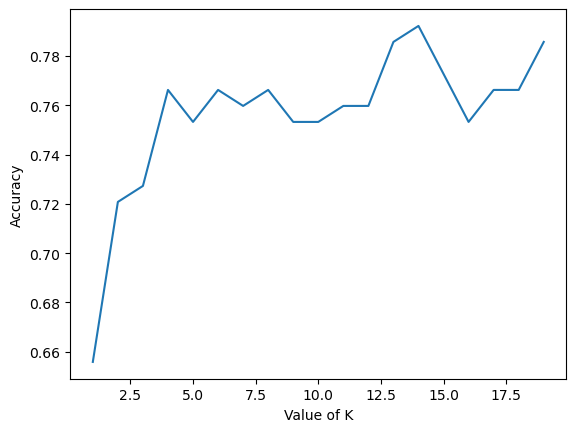

In [54]:
plt.plot(k_range,scores)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [55]:
model = KNeighborsClassifier(n_neighbors=14,metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=14)

In [56]:
accuracy = model.score(x_test,y_test)
accuracy


0.7922077922077922

In [57]:
model.predict([[1,189,60,23,846,30.1,0.398,59]]) # diabetic

C:\Users\sures\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [58]:
model.predict([[3,126,88,41,235,39.3,0.704,27]]) # not a diabetic

C:\Users\sures\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)